# Problem - Predict FIFA 2018 Man of the Match

***If you find the content informative to any extend, kindly encourge me by upvoting. ***

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/home/mkadam/Data Science - Marsian Class/Experience/FIFA Projects/FIFA 2018 - Player Dataset 2/03 Good EDA - Univariate-BiVariate/FIFA 2018 Statistics.csv')

In [4]:
data.shape

(128, 27)

In [5]:
numerical_features   = data.select_dtypes(include = [np.number]).columns
categorical_features = data.select_dtypes(include= [np.object]).columns

In [6]:
numerical_features

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [7]:
categorical_features

Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

## Univariate Analysis

In [8]:
data.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


[]

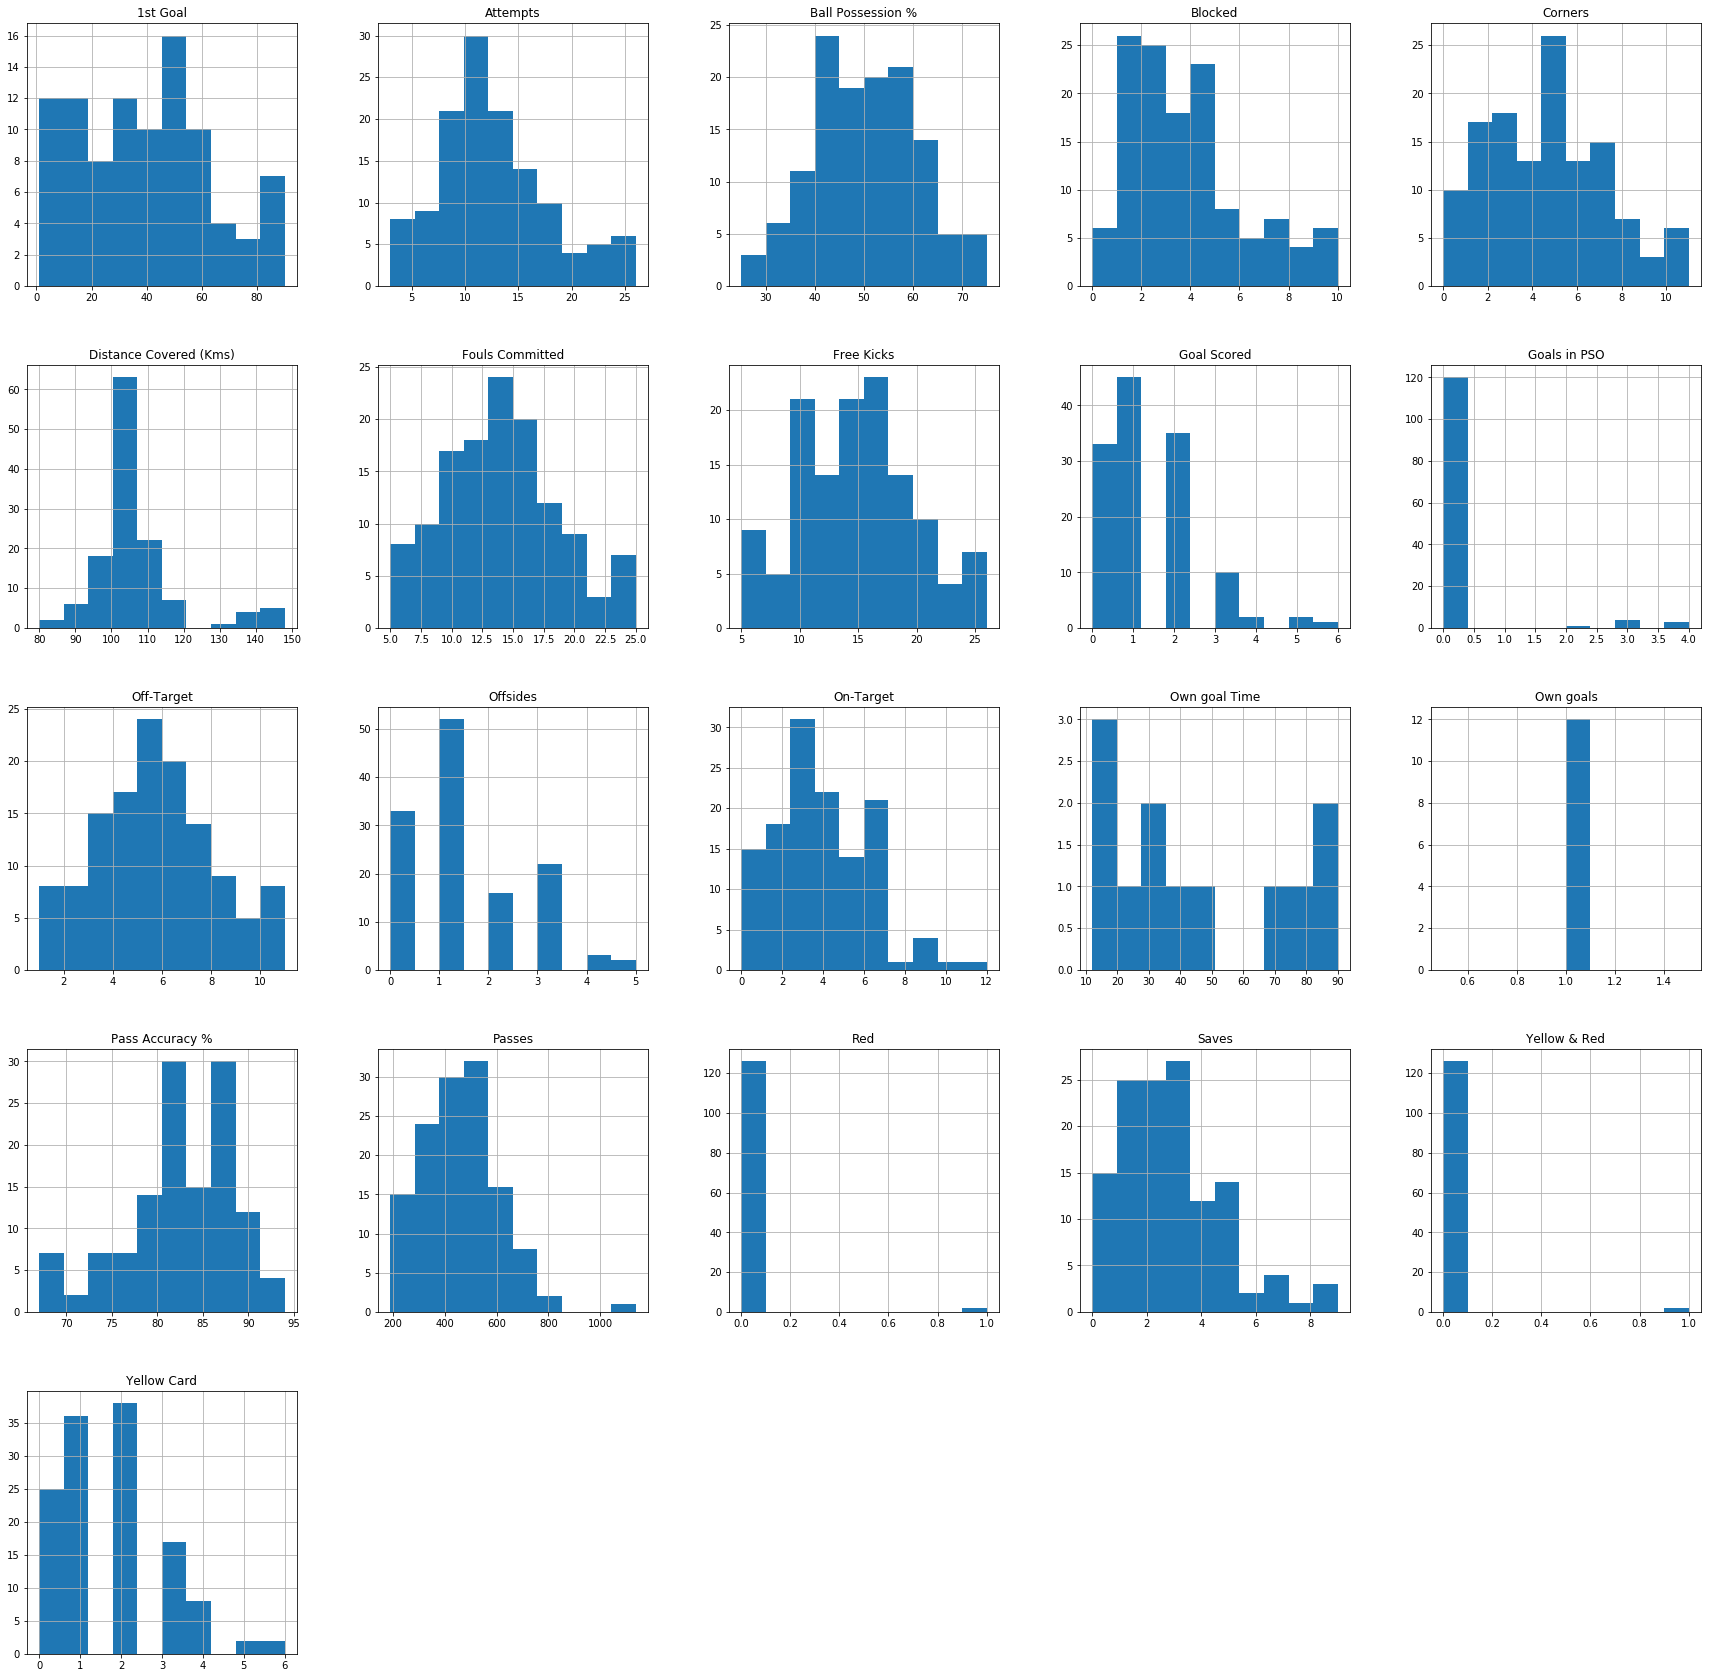

In [9]:
data.hist(figsize=(30,30))
plt.plot()

In [10]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101


For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Although data is not normally distribute, there are positive as well have negative skewedness
- 'Yello & Red', 'Red' and 'Goals in PSO' are highly positively skewed.


In [11]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


In [12]:
# encode target variable 'Man of the match' into binary format
data['Man of the Match'] = data['Man of the Match'].map({'Yes': 1, 'No': 0})

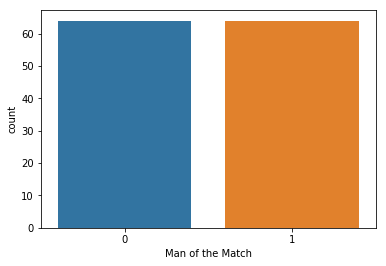

In [13]:
sns.countplot(x = 'Man of the Match', data = data)

# Bivariate analysis
    - Understanding how statistics of one feature is impacted in presence of other features
    - Commonly used tools are:
        - Pearson Correlation Coefficient (or) scatter plots
        - Pairplots

 ##### Correlation Coefficient
 - The Pearson product-moment correlation coefficient, also known as r, R, or Pearson's r, is a measure of the strength and direction of the linear relationship between two variables that is defined as the covariance of the variables divided by the product of their standard deviations.
 - It is of two type: Positive correlation and Negative correlation
     - positive correlation if the values of two variables changing with same direction
     - negative correlation when the values ofvariables change with opposite direction
 - r values always lie between -1 to + 1
 - Interpretation:
        Exactly -1. A perfect downhill (negative) linear relationship
        0.70. A strong downhill (negative) linear relationship
        0.50. A moderate downhill (negative) relationship
        0.30. A weak downhill (negative) linear relationship
        0. No linear relationship
        +0.30. A weak uphill (positive) linear relationship
        +0.50. A moderate uphill (positive) relationship
        +0.70. A strong uphill (positive) linear relationship
        Exactly +1. A perfect uphill (positive) linear relationship


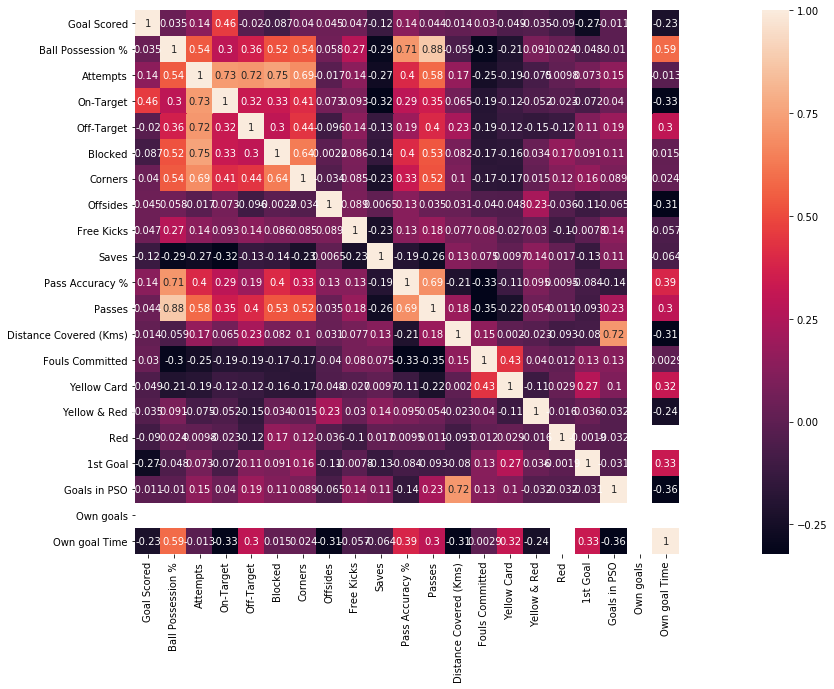

In [14]:
plt.figure(figsize=(30,10))
sns.heatmap(data[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)

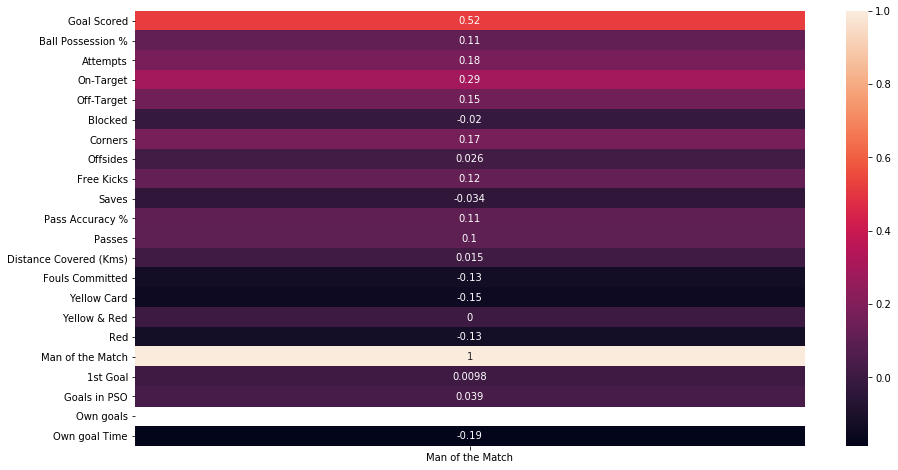

In [15]:
var = ['Man of the Match','Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
corr = data.corr()
corr = corr.filter(items = ['Man of the Match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

- 'Man of the Match' is highly correlated with 'Goal Scored', 'On-Target', 'Corners', 'Attempts', 'free Kicks', 'Yellow Card', 'red', 'Fouls Committed', 'Own goal Time'
- OWn goal time is twins of 'Ball possession %', and Passes, pass Accuracy
- Pass HCW Pass Accuracy %
- passes SCW 'Ball possession %
- Passes HCW 'Attempts'
- Goals in PSO SCW DIstance Covered (Kms)

- Correlated columns needs to be removed to avoid multicollinearity. Let's use multicollinearity check

- These features have least or no correlation with 'Man of the Match'
    - ['Blocked', 'OffSides', 'Saves','Distance Covered (Kms)', 'Yellow & Red', '1st Goal', 'Goals in PSO']
    - These features will not have impact on aur analysis and thus, holding them or retaining them is our choice
    - We will see what to do with these later

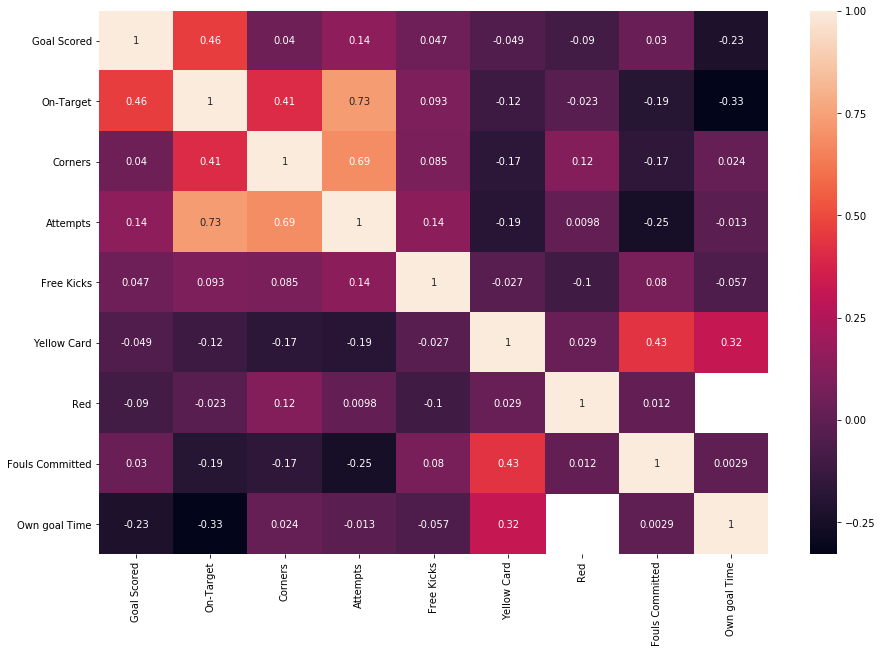

In [16]:
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
plt.figure(figsize=(15,10))
sns.heatmap((data[var].corr()), annot=True)

#### Features contributing values in 'Yello' , 'Ligh Yellow', 'Black' and 'Dark black' boxes can lead to multi-collinearity.
    Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. 
    
    To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. In R use the corr function and in python this can by accomplished by using numpy's corrcoef function.
    
    Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear. Multi-collinearity is an important pipeline steps fpr 

- Steps for Implementing VIF
    - Run a multiple regression.
    - Calculate the VIF factors.
    - Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

Let's understand relations of each of above 9 features with respect to 'Man of the match' closely using scatter plot, box plot etc.

Scatter plot is another great tool to see correlation degree and direction among features.  Using seaborn pairplot makes this task easy for us by plotting all possible combinations.

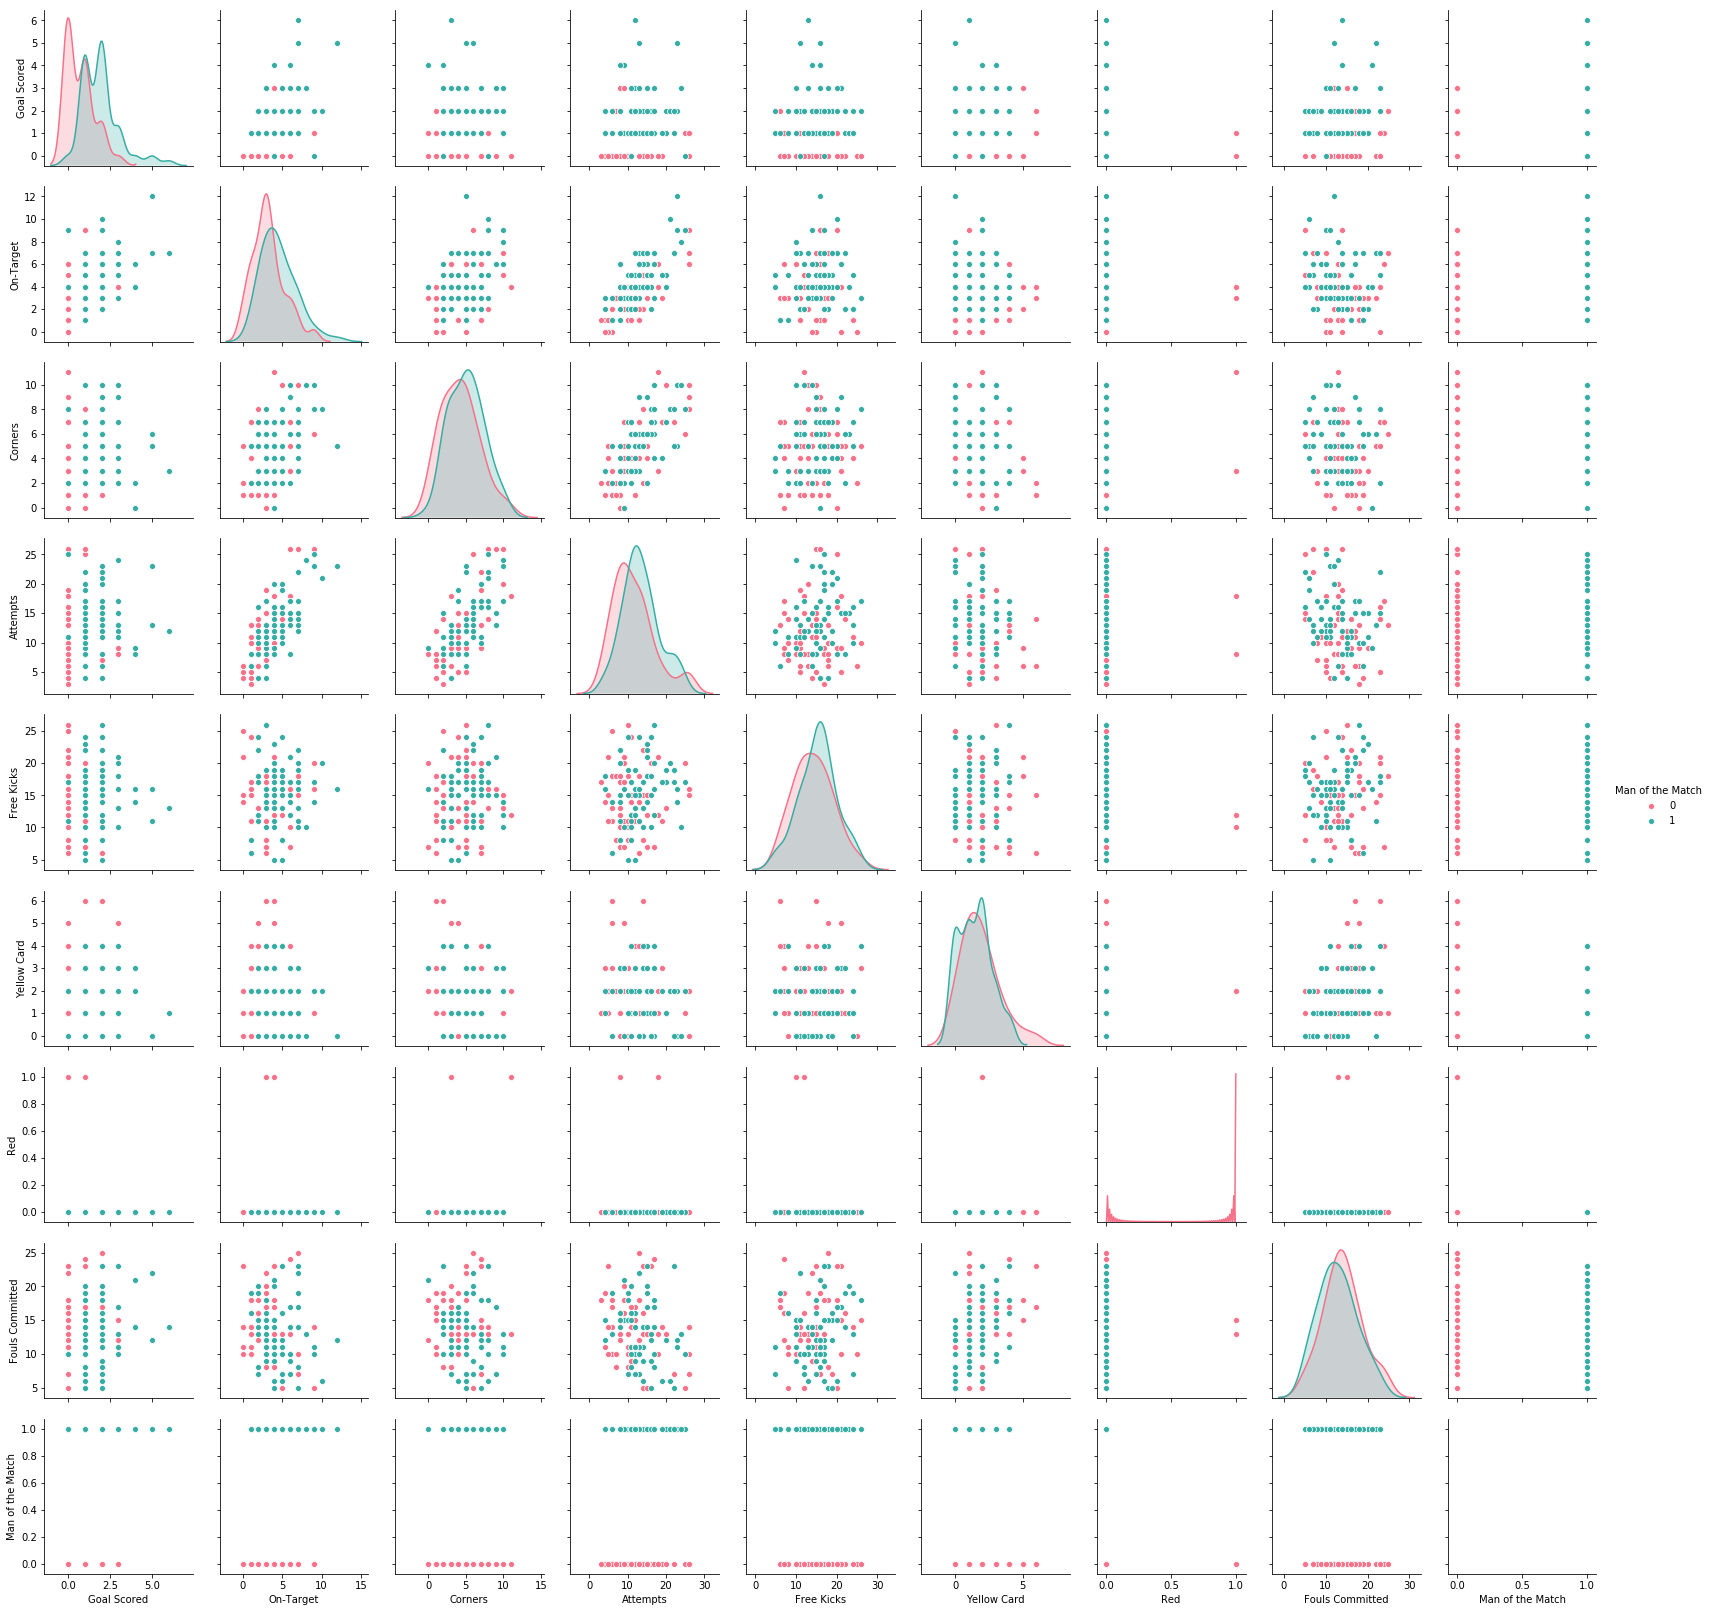

In [17]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(data[var1], hue = 'Man of the Match', palette="husl")
plt.show()

- As I can notice 'Attempts' is linearly proportional to 'On-Target' and 'Corners'
- 'Corners' and 'On-Targets' are also linearly positively proportional

## Outliers detection and removal

In [ ]:
dummy_data = data[var1]
plt.figure(figsize=(20,10))
sns.boxplot(data = dummy_data)
plt.show()

- As per boxplot there are :
    - 1 outlier in Goal scored
    - 2 in On-Target
    - 1 in corners
    - 2 in Attempts
    - 3 in Yellow Card
    - 1 in Red
- In statistics, an outlier is an observation point that is distant from other observations. An outlier may be due to   variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.
- In simple words, for a normally distributed data any value that lies beyond range of 1.5 times IQR (Inter quartile range) is considered to be an outliers.
- However, 'outliers = anything > 1.5*IQR' does not word practically, as real data are not normally distributed.
- Pragmatic approach: plot scatter visualisation or boxplot and identify abnormally distant points

-  The quantity of outliers present in this problem is not too huge and will not have gravity impact if left untreated. They are only few and within range.

## Missing values treatment
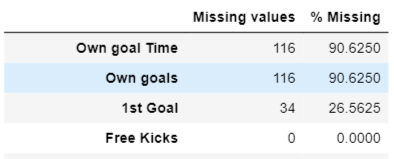

    - As 'own Goal Time' and 'Own goals' are having > 90% missing values, filling them with any combination will lead predictive model to false direction. So, dropping them is the best option
    - '1st Goal' represents 'When did the team score the 1st goal?'
    - As per discription 1st Goal should provide date information but the data is a numeric value.
    - It's possible that these numerical values is nothing but number of days between two dates [Today's date - Date when team was formed']
    - As Date when a team was formed is not given, missing values can be filled with some stats values.
    - But, filling number of days information with mean, median, mode, etc. does not seem to be informative to me, and thus, I will drop this field to rather than using it by filling with uninformative data.
    - Note: '1st Goal' is negligebly correlated with 'Man of the Match', hence, dropping this should not have any impact
   

In [ ]:
data.drop(['Own goal Time', 'Own goals', '1st Goal'], axis = 1, inplace= True)

## Categorical features encoding
    - As machine laearning models understand only numbers data in different formats including text and dates needs to be mapped into numbers prior to feeding to the model
    - The process of changing non-numerical data into numerical is called 'Encoding'
    - Before encoding let's understand how many categories or levels are present in each categorical features

In [18]:
categorical_features

Index(['Date', 'Team', 'Opponent', 'Man of the Match', 'Round', 'PSO'], dtype='object')

In [19]:
def uniqueCategories(x):
    columns = list(x.columns).copy()
    for col in columns:
        print('Feature {} has {} unique values: {}'.format(col, len(x[col].unique()), x[col].unique()))
        print('\n')
uniqueCategories(data[categorical_features].drop('Date', axis = 1))

Feature Team has 32 unique values: ['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']


Feature Opponent has 32 unique values: ['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']


Feature Man of the Match has 2 unique values: [1 0]


Feature Round has 6 unique values: ['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']


Feature PSO has 2 unique values: ['No' 'Yes']




- Categorical -['Date', 'Team', 'Opponent','Round', 'PSO']
    - Nominal - Team, Opponent
    - Ordinal - Round
    - Interval - Date, PSO is binary
- Including nominal data is of no use, however, I am guessing combination of Team and Opponent should be useful. If not, we will drop them. Also, 'Man of the Match' depends, as per data, on goal scored. A player from good team should be capable enough to score high. So, team branding turns out to be an important factor. In our data, there is no way to identify each team brand value.
- I believe 'Round' should also not have any impact on 'Man of the Match' because, a player performance should be consistent over all matches to become man of the match than just in a particular round. Thus, let's give equal weitage to each round.
- PSO is binary 
- I am not going to include 'Match date' as it should definately not impact a player formance.

In [ ]:
data.drop('Date', axis = 1, inplace=True)

 - Dropping "Corners', 'Fouls Committed' and 'On-Targets' will remove high correlated elements and remove chances of multi-collinearity. these features are selected based on their low collinearity with 'Man of the Match' and high collinearity with other features.

In [ ]:
data.drop(['Corners', 'Fouls Committed', 'On-Target'], axis = 1, inplace=True)

In [ ]:
print(data.shape)
data.head()

In [ ]:
cleaned_data  = pd.get_dummies(data)

In [ ]:
print(cleaned_data.shape)
cleaned_data.head()

    - The data has been cleaned and is ready for further steps in data pipeling
        - Pre-processing
        - Modeling
        - Evaluation
        - Prediction

***If you found the content informative to any extend, kindly encourge me by upvoting. :)***